### This script contains the following sections:

#### 1. Package and Data Imports
#### 2. Data Wrangling
#### 3. Map Creation

# 1. Package and Data Imports

In [47]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib

import folium
import json

In [48]:
path = r'C:\Users\\data_emergency_ex6.1'
data_path = r'C:\Users\\data_emergency_ex6.1\Data'

In [49]:
#import df
df = pd.read_csv(os.path.join(data_path,'Prepared','3.data_join_facilities.csv'))
df.head(2)

,year,oshpd_id,county_number,county_name,facility_name,dba_address1,dba_city,dba_zip_code,license_category_desc,teaching_hospital_desc,...,medi_cal,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit
0,2012,106010735,1,Alameda,ALAMEDA HOSPITAL,2070 CLINTON,ALAMEDA,94501,General Acute Care,0.0,...,549.0,2740.0,3469.0,4339.0,0.0,522.0,12918.0,287.0,2595.0,13727.0
1,2012,106010739,1,Alameda,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,2450 ASHBY STREET,BERKELEY,94705,General Acute Care,0.0,...,8613.0,5707.0,1877.0,12926.0,0.0,534.0,33867.0,941.0,6047.0,35342.0


In [50]:
df.isna().sum()

year                      0
oshpd_id                  0
county_number             0
county_name               0
facility_name             0
dba_address1              0
dba_city                  0
dba_zip_code              0
license_category_desc     0
teaching_hospital_desc    0
licensed_bed_size         0
er_service_level          0
sex_male                  0
sex_female                0
sex_unk                   0
age_01_09                 0
age_10_19                 0
age_20_29                 0
age_30_39                 0
age_40_49                 0
age_50_59                 0
age_60_69                 0
age_70_79                 0
age_80_                   0
age_under_1               0
age_unknown               0
asian_pacific_island      0
black                     0
hispanic                  0
native_american_eski      0
other_race                0
unknown_race              0
white                     0
acute_care                0
against_medical_advice    0
died                

In [51]:
# Assign JSON path name

county_json = r'C:\Users\\data_emergency_ex6.1\Data\Original\california-counties.geojson.json'

In [52]:
#Import JSON file

geo_file = open(county_json,)

#return json object to dict
geo_data = json.load(geo_file)


# #iterate through json and print 
for i in geo_data['features']:
    print("Keys are " + str(i.keys()), "Properties are: " + str(i['properties']))

Keys are dict_keys(['type', 'properties', 'geometry']) Properties are: {'name': 'Alameda', 'cartodb_id': 1, 'created_at': '2015-07-04T21:04:58Z', 'updated_at': '2015-07-04T21:04:58Z'}
Keys are dict_keys(['type', 'properties', 'geometry']) Properties are: {'name': 'Alpine', 'cartodb_id': 2, 'created_at': '2015-07-04T21:04:58Z', 'updated_at': '2015-07-04T21:04:58Z'}
Keys are dict_keys(['type', 'properties', 'geometry']) Properties are: {'name': 'Amador', 'cartodb_id': 3, 'created_at': '2015-07-04T21:04:58Z', 'updated_at': '2015-07-04T21:04:58Z'}
Keys are dict_keys(['type', 'properties', 'geometry']) Properties are: {'name': 'Butte', 'cartodb_id': 4, 'created_at': '2015-07-04T21:04:58Z', 'updated_at': '2015-07-04T21:04:58Z'}
Keys are dict_keys(['type', 'properties', 'geometry']) Properties are: {'name': 'Calaveras', 'cartodb_id': 5, 'created_at': '2015-07-04T21:04:58Z', 'updated_at': '2015-07-04T21:04:58Z'}
Keys are dict_keys(['type', 'properties', 'geometry']) Properties are: {'name': 'C

# 2.Data Wrangling

In [53]:
print(df.columns)

Index(['year', 'oshpd_id', 'county_number', 'county_name', 'facility_name',
       'dba_address1', 'dba_city', 'dba_zip_code', 'license_category_desc',
       'teaching_hospital_desc', 'licensed_bed_size', 'er_service_level',
       'sex_male', 'sex_female', 'sex_unk', 'age_01_09', 'age_10_19',
       'age_20_29', 'age_30_39', 'age_40_49', 'age_50_59', 'age_60_69',
       'age_70_79', 'age_80_', 'age_under_1', 'age_unknown',
       'asian_pacific_island', 'black', 'hispanic', 'native_american_eski',
       'other_race', 'unknown_race', 'white', 'acute_care',
       'against_medical_advice', 'died', 'hospice_care', 'home_health_service',
       'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care',
       'medi_cal', 'medicare', 'other_payer', 'private_coverage', 'selfpay',
       'all_other', 'english', 'spanish', 'ed_admit', 'ed_visit'],
      dtype='object')


Create two new columns to answer the question, which counties have the highest proportion of self paying patient encounters since 2012?

In [54]:
# 1. Create new column with total number of dispositions
df['total_disp_encounters'] = df[['acute_care','against_medical_advice', 'died', 'hospice_care', 'home_health_service',
       'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care']].sum(axis = 1)

In [55]:
df.head(2)

,year,oshpd_id,county_number,county_name,facility_name,dba_address1,dba_city,dba_zip_code,license_category_desc,teaching_hospital_desc,...,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit,total_disp_encounters
0,2012,106010735,1,Alameda,ALAMEDA HOSPITAL,2070 CLINTON,ALAMEDA,94501,General Acute Care,0.0,...,2740.0,3469.0,4339.0,0.0,522.0,12918.0,287.0,2595.0,13727.0,13579.0
1,2012,106010739,1,Alameda,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,2450 ASHBY STREET,BERKELEY,94705,General Acute Care,0.0,...,5707.0,1877.0,12926.0,0.0,534.0,33867.0,941.0,6047.0,35342.0,35255.0


In [61]:
#1.5 - group data by county before calculating proportion of discharges against medical advice.

df_grouped_county_against = df.groupby(['county_number','county_name'])[['against_medical_advice','routine', 
                                                         'total_disp_encounters']].sum().reset_index()

df_grouped_county_against.head(2)

,county_number,county_name,against_medical_advice,routine,total_disp_encounters
0,1,Alameda,70138.0,4513083.0,4768063.0
1,3,Amador,1053.0,168119.0,176089.0


In [62]:
#2. Calculate proportion of disposition encounters  against medical advice. 
# Encounters are not the same as patient count, One patient can have many encounters. One limitation of the data is that we cannot know repeated encounters.

df_grouped_county_against['proportion_against_advice'] = df_grouped_county_against['against_medical_advice'] / df_grouped_county_against['total_disp_encounters']
df_grouped_county_against.head(2)

,county_number,county_name,against_medical_advice,routine,total_disp_encounters,proportion_against_advice
0,1,Alameda,70138.0,4513083.0,4768063.0,0.01471
1,3,Amador,1053.0,168119.0,176089.0,0.00598


In [63]:
#2. Calculate proportion of disposition encounters  against medical advice. 
# Encounters are not the same as patient count, One patient can have many encounters. One limitation of the data is that we cannot know repeated encounters.

df_grouped_county_against['proportion_routine'] = df_grouped_county_against['routine'] / df_grouped_county_against['total_disp_encounters']
df_grouped_county_against.head(2)

,county_number,county_name,against_medical_advice,routine,total_disp_encounters,proportion_against_advice,proportion_routine
0,1,Alameda,70138.0,4513083.0,4768063.0,0.01471,0.946523
1,3,Amador,1053.0,168119.0,176089.0,0.00598,0.954739


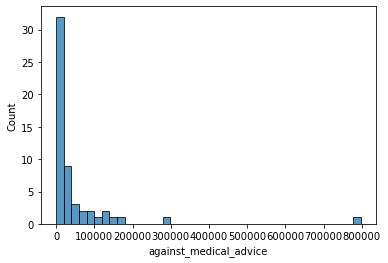

In [64]:
# check for outlier values

sns.histplot(df_grouped_county_against['against_medical_advice']);

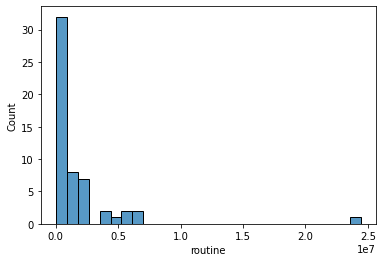

In [65]:
sns.histplot(df_grouped_county_against['routine']);

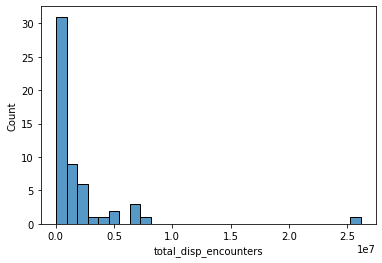

In [33]:
sns.histplot(df_grouped_county_against['total_disp_encounters']);

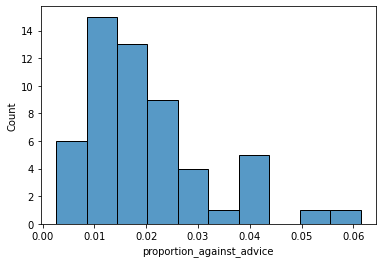

In [41]:
# check for outlier values

sns.histplot(df_grouped_county_against['proportion_against_advice']);

In [66]:
#check for duplicated before subsetting
df[df.duplicated()]

,year,oshpd_id,county_number,county_name,facility_name,dba_address1,dba_city,dba_zip_code,license_category_desc,teaching_hospital_desc,...,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit,total_disp_encounters


In [67]:
# subset data before consistency checks

df_map = df_grouped_county_against.copy()
df_map.head(2)

,county_number,county_name,against_medical_advice,routine,total_disp_encounters,proportion_against_advice,proportion_routine
0,1,Alameda,70138.0,4513083.0,4768063.0,0.01471,0.946523
1,3,Amador,1053.0,168119.0,176089.0,0.00598,0.954739


In [68]:
# Recheck subsettted data for missing vals

df_map.isna().sum()

county_number                0
county_name                  0
against_medical_advice       0
routine                      0
total_disp_encounters        0
proportion_against_advice    0
proportion_routine           0
dtype: int64

# 3. Create Map

In [69]:
#create folum object
geo_map = folium.Map(location = [37.5, -119.675], zoom_start = 6)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations

folium.Choropleth( geo_data = geo_data,
                 data = df_map,
                 columns = ['county_number','proportion_against_advice'],
                 key_on = 'feature.properties.cartodb_id',
                 fill_color = 'YlOrBr', fill_opacity = 0.7, line_opacity = 0.1,
                 legend_name = 'Encounter Proportion').add_to(geo_map).geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=False)) # add county names from json file as tooltips

folium.LayerControl().add_to(geo_map)

geo_map

**Comment**

When looking at proportion of dispositions (discharge) encounters since 2012, San Bernadino, Shasta and Yuba have the highest proportions. I assumed that bigger counties will have higher proportions but in this case, I can infer that county size does not dictate the proportion of discharge encounters against medical advice.

The visualization did not answer my questions directly but it will help me frame more specific questions to answer. Because of the limitation of the dataset, I cannot know which race group occupy the most percentage of dispositions. I will look for more data about *patient encounters in the ED based on race group* to further enrich my analysis. 

In [93]:
geo_map.save(os.path.join(path,'Analysis','Visualizations','2.Spacial','2.spacial_data.html'))

In [70]:
#save dfs for dataviz in tableau

df_grouped_county_against.to_csv(os.path.join(data_path,'Prepared','4.county_against_adv_grouped.csv'))